In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Euler's Method

In [19]:
def euler_method(f, x0, y0, h, N, exact_solution=None):
    xs = [x0]
    ys = [y0]
    dys = [f(x0, y0)]
    exacts = [exact_solution(x0)] if exact_solution else []

    x, y = x0, y0
    for i in range(N):
        y_prime = f(x, y)
        y = y + h * y_prime
        x = x + h

        xs.append(x)
        ys.append(y)
        dys.append(f(x, y))
        if exact_solution:
            exacts.append(exact_solution(x))

    # Build table
    data = {
        'x_i': xs,
        "y'(x_i)": dys,
        'y_estimate': ys,
    }
    if exact_solution:
        data['y_exact'] = exacts
        data['error'] = np.abs(np.array(ys) - np.array(exacts))

    table = pd.DataFrame(data)
    print(table)

    # Plot
    plt.plot(xs, ys, marker='o', label="Euler Approximation")
    if exact_solution:
        plt.plot(xs, exacts, linestyle='--', label="Exact Solution", color='orange')

    plt.title("Euler's Method vs. Exact Solution")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.legend()
    plt.show()

    # return table


    x_i   y'(x_i)  y_estimate
0   0.0  1.000000    1.000000
1   0.1  1.200000    1.100000
2   0.2  1.420000    1.220000
3   0.3  1.662000    1.362000
4   0.4  1.928200    1.528200
5   0.5  2.221020    1.721020
6   0.6  2.543122    1.943122
7   0.7  2.897434    2.197434
8   0.8  3.287178    2.487178
9   0.9  3.715895    2.815895
10  1.0  4.187485    3.187485


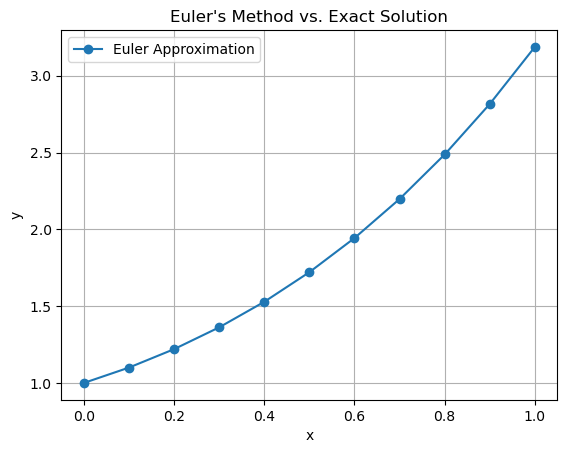

In [20]:
def f(x, y):
    return x + y

euler_method(f, x0=0, y0=1, h=0.1, N=10)

    x_i    y'(x_i)  y_estimate    y_exact     error
0   0.0   1.000000    1.000000   1.000000  0.000000
1   0.1   1.200000    1.100000   1.110342  0.010342
2   0.2   1.420000    1.220000   1.242806  0.022806
3   0.3   1.662000    1.362000   1.399718  0.037718
4   0.4   1.928200    1.528200   1.583649  0.055449
5   0.5   2.221020    1.721020   1.797443  0.076423
6   0.6   2.543122    1.943122   2.044238  0.101116
7   0.7   2.897434    2.197434   2.327505  0.130071
8   0.8   3.287178    2.487178   2.651082  0.163904
9   0.9   3.715895    2.815895   3.019206  0.203311
10  1.0   4.187485    3.187485   3.436564  0.249079
11  1.1   4.706233    3.606233   3.908332  0.302099
12  1.2   5.276857    4.076857   4.440234  0.363377
13  1.3   5.904542    4.604542   5.038593  0.434051
14  1.4   6.594997    5.194997   5.710400  0.515403
15  1.5   7.354496    5.854496   6.463378  0.608882
16  1.6   8.189946    6.589946   7.306065  0.716119
17  1.7   9.108941    7.408941   8.247895  0.838954
18  1.8  10.

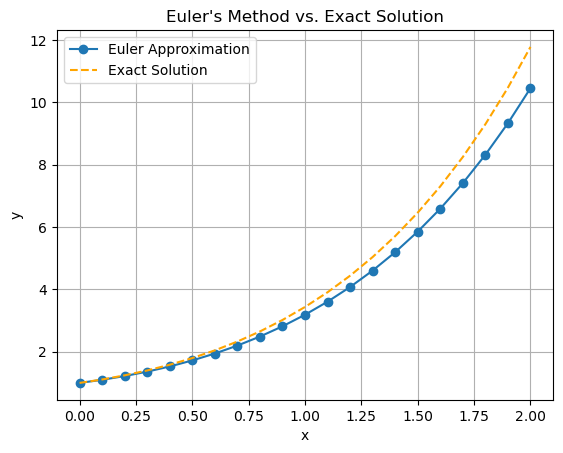

In [21]:
from math import exp

def f(x, y):
    return x + y

def exact_y(x):
    return 2 * np.exp(x) - x - 1

euler_method(f, x0=0, y0=1, h=0.1, N=20, exact_solution=exact_y)

In [61]:
def euler_method_widget(f_expr, x0, y0, h, N, exact_expr=''):
    try:
        f = safe_eval(f_expr)
        x_vals = [x0]
        y_vals = [y0]
        dy_vals = [f(x0, y0)]

        x, y = x0, y0
        for i in range(N):
            y_prime = f(x, y)
            y += h * y_prime
            x += h
            x_vals.append(x)
            y_vals.append(y)
            dy_vals.append(f(x, y))

        data = {
            'x_i': x_vals,
            "y'(x_i)": dy_vals,
            'y_estimate': y_vals
        }

        # === Display dy/dx formula ===
        latex_expr = f_expr.replace('np.', '')
        latex_expr = latex_expr.replace('exp(', r'e^{').replace(')', '}')
        latex_expr = latex_expr.replace('log', r'\ln')
        latex_expr = latex_expr.replace('sqrt', r'\sqrt')
        latex_expr = latex_expr.replace('*', r'\cdot')

        display(Math(r"\frac{dy}{dx} = " + latex_expr))

        # === Exact solution (optional) ===
        if exact_expr.strip():
            try:
                exact = safe_exact(exact_expr)
                y_exact_vals = [exact(xi) for xi in x_vals]
                errors = np.abs(np.array(y_vals) - np.array(y_exact_vals))
                data['y_exact'] = y_exact_vals
                data['error'] = errors

                latex_exact = exact_expr.replace('np.', '')
                latex_exact = latex_exact.replace('exp(', r'e^{').replace(')', '}')
                latex_exact = latex_exact.replace('log', r'\ln')
                latex_exact = latex_exact.replace('sqrt', r'\sqrt')
                latex_exact = latex_exact.replace('*', r'\cdot')

                display(Math(r"y(x) = " + latex_exact))
            except Exception as e:
                print("⚠️ Error evaluating exact solution:", e)

        # === Display table ===
        df = pd.DataFrame(data)
        display(df)

        # === Plot ===
        plt.figure(figsize=(10, 5))
        plt.plot(x_vals, y_vals, label="Euler Approx", marker='o')
        if 'y_exact' in data:
            plt.plot(x_vals, y_exact_vals, label="Exact", linestyle='--', color='orange')
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title("Euler's Method Approximation")
        plt.grid(True)
        plt.legend()
        plt.show()

    except Exception as e:
        print("⚠️ Error in evaluation:", e)


In [62]:
interact_manual(
    euler_method_widget,
    f_expr=Text(value='x + y', description="dy/dx =", style={'description_width': 'initial'}),
    x0=FloatText(value=0.0, description="x₀", style={'description_width': 'initial'}),
    y0=FloatText(value=1.0, description="y₀", style={'description_width': 'initial'}),
    h=FloatText(value=0.1, description="Step size (h)", style={'description_width': 'initial'}),
    N=IntText(value=10, description="# steps", style={'description_width': 'initial'}),
    exact_expr=Text(value='2*np.exp(x) - x - 1', description="Exact y(x)", style={'description_width': 'initial'})
)


interactive(children=(Text(value='x + y', continuous_update=False, description='dy/dx =', style=TextStyle(desc…

<function __main__.euler_method_widget(f_expr, x0, y0, h, N, exact_expr='')>

# Newton's Law of Cooling

In [72]:
def newtons_cooling_widget(T0, Ts, k, t_max, T_max):
    # Time grid
    t_vals = np.linspace(0, t_max, 300)

    # Exact solution
    T_exact = Ts + (T0 - Ts) * np.exp(-k * t_vals)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(t_vals, T_exact, label="Object Temp $T(t)$", color="blue", linewidth=2)

    # Ambient temperature line
    plt.axhline(y=Ts, color='gray', linestyle='--', linewidth=2, label="Ambient Temp $T_s$")

    plt.title("Newton's Law of Cooling")
    plt.xlabel("Time $t$")
    plt.ylabel("Temperature $T(t)$")
    plt.ylim(0, T_max)
    plt.grid(True)
    plt.legend()
    plt.show()

    # Display exact formula
    k_str = str(round(k, 3))
    T0_str = str(round(T0, 3))
    Ts_str = str(round(Ts, 3))
    formula = (
        r"T(t) = " + Ts_str + r" + (" + T0_str + r" - " + Ts_str + r") \cdot e^{-" + k_str + r"t}"
    )
    display(Math(formula))


In [73]:
interact(
    newtons_cooling_widget,
    T0=FloatSlider(value=90, min=0, max=200, step=1, description="Initial Temp $T_0$", style={'description_width': 'initial'}),
    Ts=FloatSlider(value=20, min=-20, max=100, step=1, description="Ambient Temp $T_s$", style={'description_width': 'initial'}),
    k=FloatSlider(value=0.1, min=0.01, max=1.0, step=0.01, description="Cooling rate $k$", style={'description_width': 'initial'}),
    t_max=IntSlider(value=60, min=10, max=300, step=5, description="Time Range $t_{max}$", style={'description_width': 'initial'}),
    T_max=FloatSlider(value=100, min=10, max=300, step=5, description="Y-Axis Max $T_{max}$", style={'description_width': 'initial'})
)


interactive(children=(FloatSlider(value=90.0, description='Initial Temp $T_0$', max=200.0, step=1.0, style=Sli…

<function __main__.newtons_cooling_widget(T0, Ts, k, t_max, T_max)>

# Logistic growth

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider
from IPython.display import display, Math, Latex

def format_number(x):
    """Rounds to 3 decimal places unless x is (very close to) an integer."""
    if abs(x - round(x)) < 1e-8:
        return str(int(round(x)))
    else:
        return str(round(x, 3))

def logistic_growth_plot(k, K, P0, t_max, P_max):
    def dPdt(t, P):
        return k * P * (1 - P / K)

    # Vector field
    t_vals = np.linspace(0, t_max, 20)
    P_vals = np.linspace(0, P_max, 20)
    T, P = np.meshgrid(t_vals, P_vals)
    dT = np.ones_like(T)
    dP = dPdt(T, P)
    magnitude = np.sqrt(dT**2 + dP**2)
    dT_norm = dT / magnitude
    dP_norm = dP / magnitude

    # Plot slope field
    plt.figure(figsize=(10, 6))
    plt.quiver(T, P, dT_norm, dP_norm, angles='xy', scale_units='xy', scale=0.5, color='gray', alpha=0.6)

    # Exact solution
    def logistic_solution(t):
        return K / (1 + ((K - P0) / P0) * np.exp(-k * t))

    t_curve = np.linspace(0, t_max, 300)
    P_curve = logistic_solution(t_curve)
    P0_str = format_number(P0)  # move this above if needed
    plt.plot(t_curve, P_curve, label=f'Solution with $P_0 = {P0_str}$', color='blue', linewidth=2)


    # Decorate plot
    plt.title("Logistic Growth with Slope Field and Exact Solution")
    plt.xlabel("Time $t$")
    plt.ylabel("Population $P$")
    plt.ylim(0, P_max)
    plt.xlim(0, t_max)
    plt.grid(True)
    plt.legend()
    plt.show()

    # === Display full and simplified LaTeX formulas below ===
    A = (K - P0) / P0
    K_str = format_number(K)
    P0_str = format_number(P0)
    A_str = format_number(A)
    k_str = format_number(k)

    full_expr = (
        r"P(t) = \frac{{{K}}}{{1 + \left( \frac{{{K} - {P0}}}{{{P0}}} \right) e^{{-{k}t}} }}"
        .format(K=K_str, P0=P0_str, k=k_str)
    )

    simplified_expr = (
        r"= \frac{{{K}}}{{1 + {A} \cdot e^{{-{k}t}} }}"
        .format(K=K_str, A=A_str, k=k_str)
    )

    display(Math(full_expr + simplified_expr))


In [69]:
interact(
    logistic_growth_plot,
    k=FloatSlider(value=0.5, min=0.01, max=2.0, step=0.01, description='Growth rate (k)', style={'description_width': 'initial'}),
    K=FloatSlider(value=100, min=10, max=500, step=10, description='Carrying capacity (K)', style={'description_width': 'initial'}),
    P0=FloatSlider(value=10, min=1, max=300, step=1, description='Initial population (P₀)', style={'description_width': 'initial'}),
    t_max=IntSlider(value=20, min=5, max=50, step=1, description='Time range (t_max)', style={'description_width': 'initial'}),
    P_max=FloatSlider(value=120, min=10, max=600, step=10, description='Y-axis max (P_max)', style={'description_width': 'initial'})
)


interactive(children=(FloatSlider(value=0.5, description='Growth rate (k)', max=2.0, min=0.01, step=0.01, styl…

<function __main__.logistic_growth_plot(k, K, P0, t_max, P_max)>